In [118]:
# Importar librerías necesarias para el proyecto
# Numpy para operaciones numéricas, pandas para manejo de datos, seaborn y matplotlib para visualizaciones,
# y varias herramientas de scikit-learn para preprocesamiento y modelado.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")  # Ignorar advertencias para limpiar la salida del notebook

In [119]:
# Cargar el conjunto de datos desde un archivo CSV
file_path = 'data/raw/CarbonEmission.csv'
data = pd.read_csv(file_path)

# **Simple EDA (Análisis Exploratorio de Datos)**

In [120]:
# Mostrar las primeras filas del dataset para obtener una vista previa de los datos
data.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [121]:
# Revisar información general del dataset, como tipo de datos y valores faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [122]:
# Verificar si hay duplicados en el dataset
has_duplicates = data.duplicated().any()

if has_duplicates:
    print("Duplicados encontrados")
else:
    print("Duplicados no encontrados")

Duplicados no encontrados


In [123]:
# Revisar si hay valores faltantes y en qué columnas se encuentran
has_missing_values = data.isnull().any().any()

if has_missing_values:
    print("Valores faltantes encontrados")
else:
    print("Valores faltantes no encontrados")

Valores faltantes encontrados


In [124]:
# Revisamos donde exactamente hay filas con valores faltantes
data.isnull().sum(axis = 0)

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

In [125]:
#Podemos ver que nos faltan valores si la persona no conduce. Entonces, podemos reemplazar estos valores, no eliminarlos,
#se reemplazan valores faltantes por 'None' en caso de que la persona no conduzca
data.replace(np.nan, 'None', inplace=True)

In [126]:
# Revisar los tipos de datos de las variables para asegurar la correcta manipulación de estos
data.dtypes

Body Type                        object
Sex                              object
Diet                             object
How Often Shower                 object
Heating Energy Source            object
Transport                        object
Vehicle Type                     object
Social Activity                  object
Monthly Grocery Bill              int64
Frequency of Traveling by Air    object
Vehicle Monthly Distance Km       int64
Waste Bag Size                   object
Waste Bag Weekly Count            int64
How Long TV PC Daily Hour         int64
How Many New Clothes Monthly      int64
How Long Internet Daily Hour      int64
Energy efficiency                object
Recycling                        object
Cooking_With                     object
CarbonEmission                    int64
dtype: object

In [127]:
# Revisamos valores únicos
data.nunique()

Body Type                           4
Sex                                 2
Diet                                4
How Often Shower                    4
Heating Energy Source               4
Transport                           3
Vehicle Type                        6
Social Activity                     3
Monthly Grocery Bill              250
Frequency of Traveling by Air       4
Vehicle Monthly Distance Km      4003
Waste Bag Size                      4
Waste Bag Weekly Count              7
How Long TV PC Daily Hour          25
How Many New Clothes Monthly       51
How Long Internet Daily Hour       25
Energy efficiency                   3
Recycling                          16
Cooking_With                       16
CarbonEmission                   3509
dtype: int64

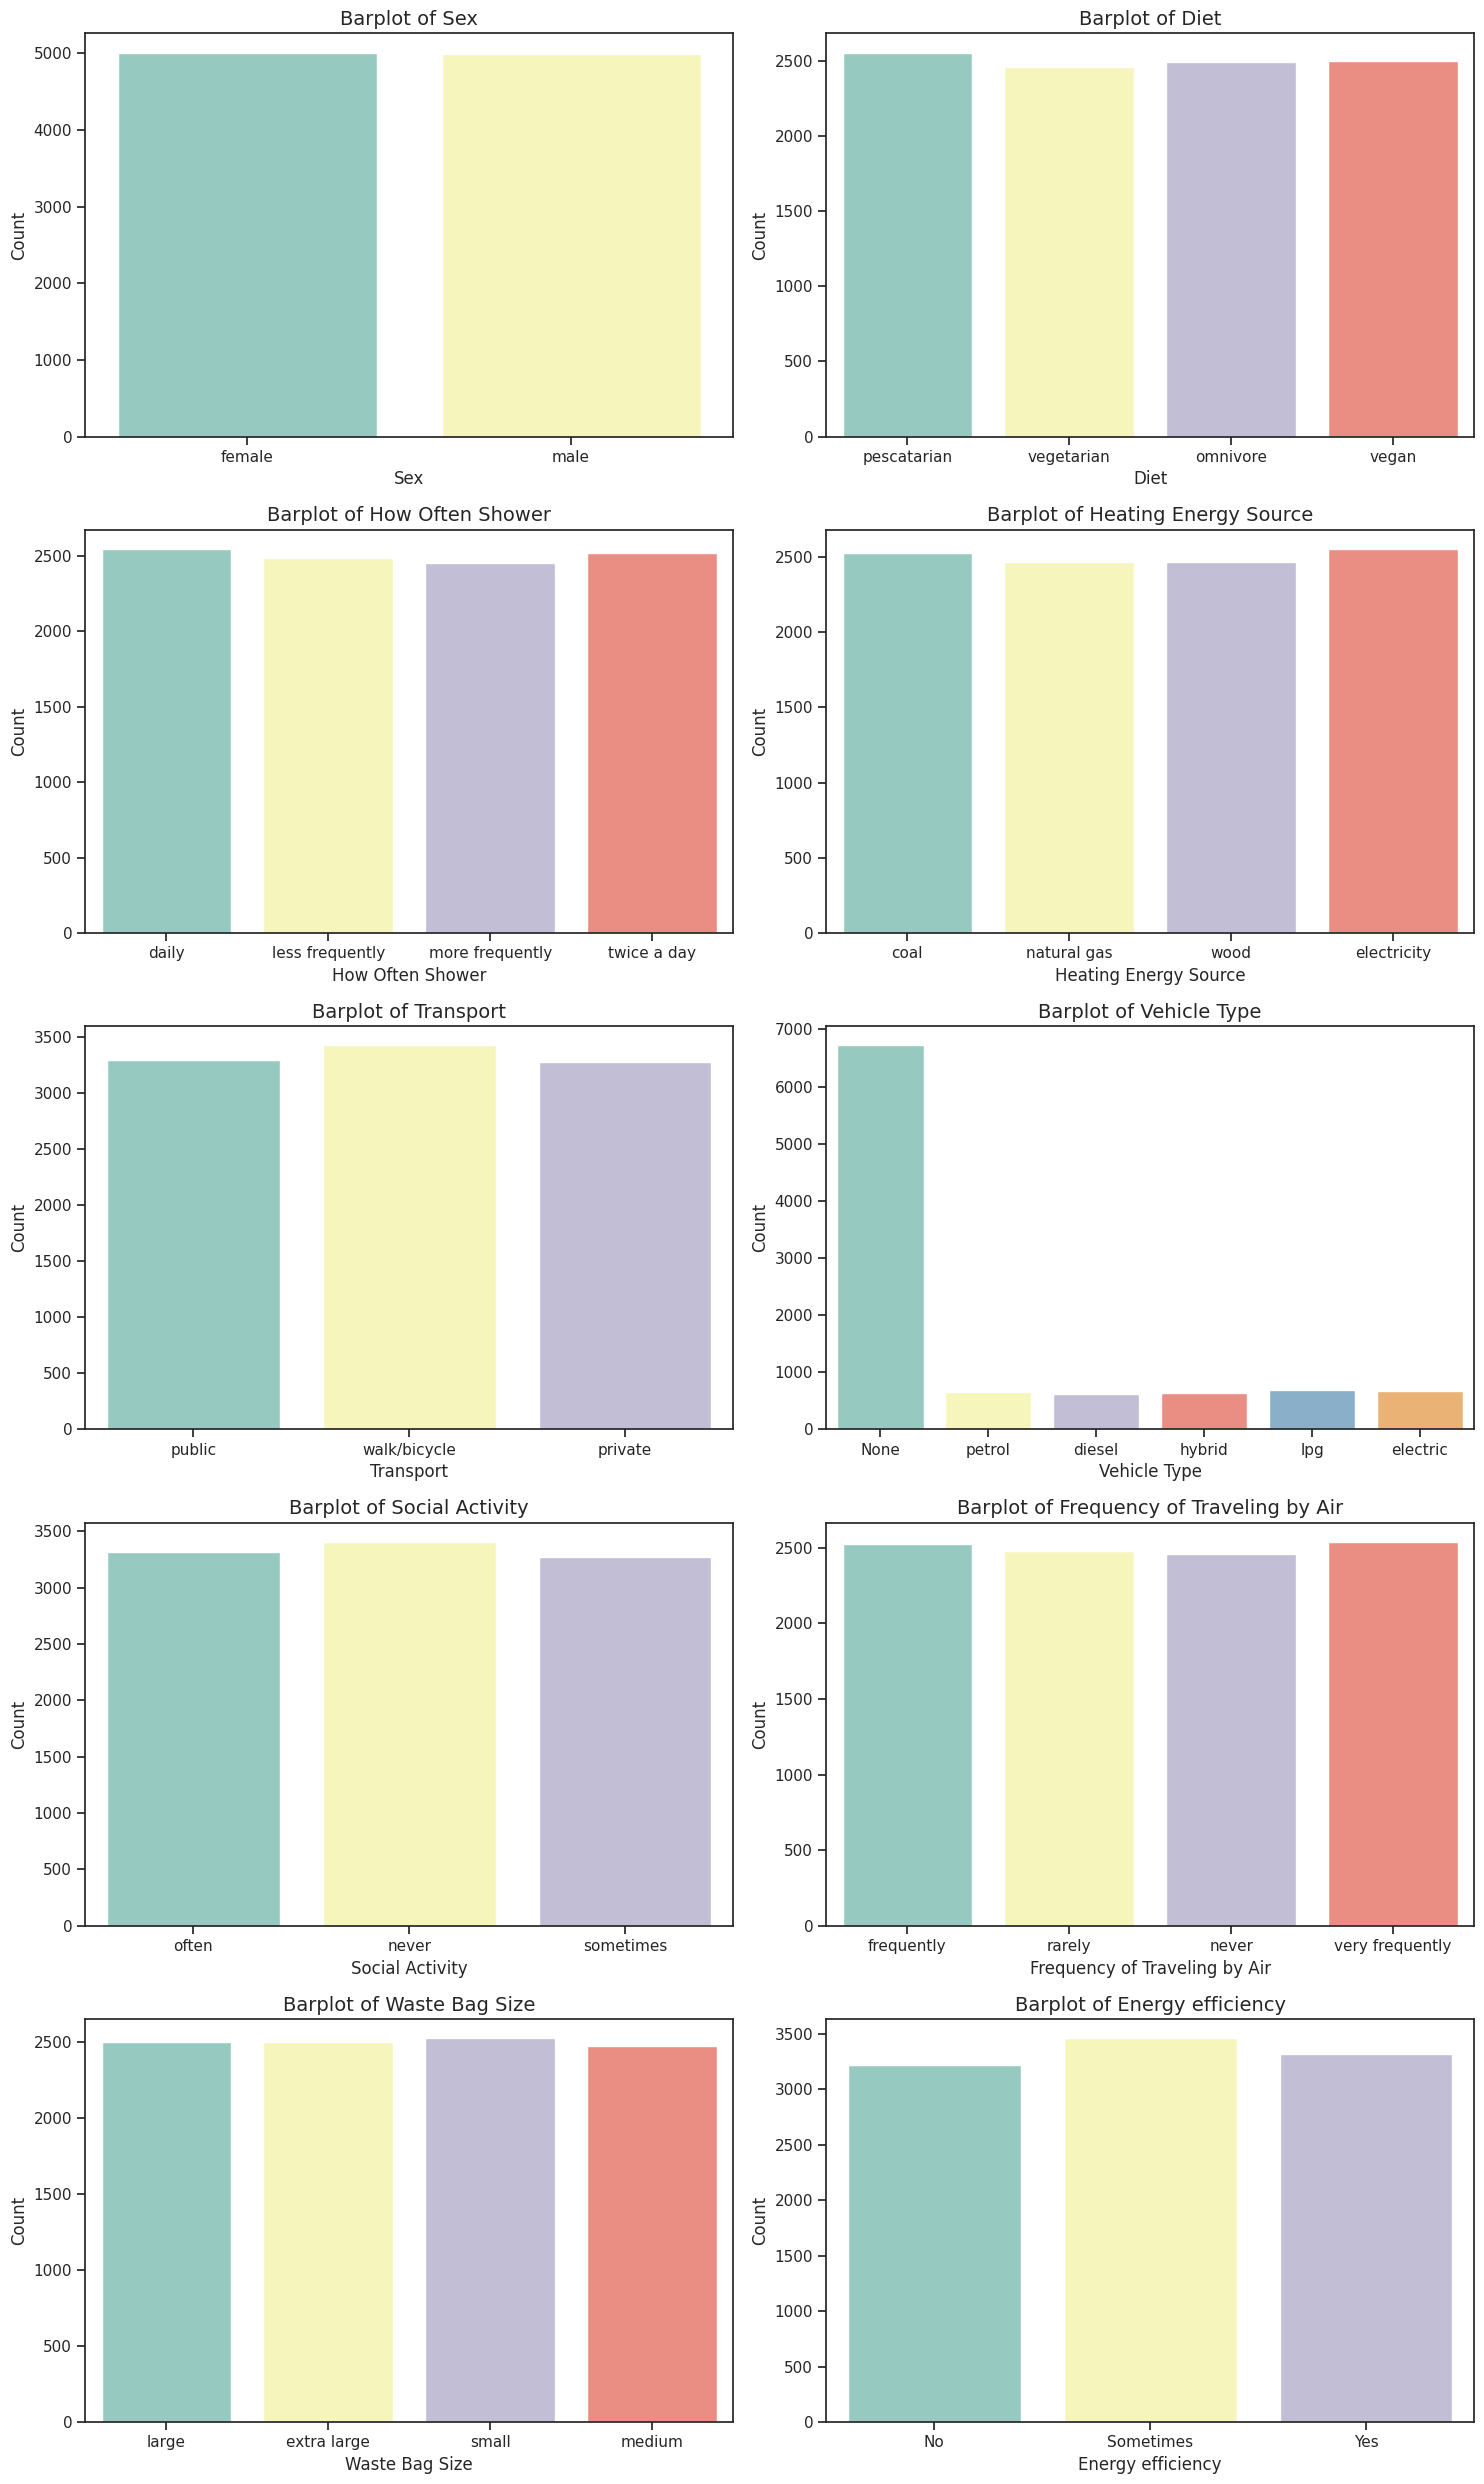

In [128]:
# Se especifican las columnas que se requieren visualizar
columns_to_visualize = ['Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity',
                       'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency']

# Se generan visualizaciones para explorar la distribución de varias características dentro del dataset
num_plots = len(columns_to_visualize)
num_cols = 2
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)

sns.set(font='monospace')

sns.set_style('ticks')

for i, column in enumerate(columns_to_visualize):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    sns.countplot(x=data[column], ax=ax, palette="Set3")

    ax.set_title(f'Barplot of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()

plt.show()

In [129]:
# Se utiliza la codificación de etiquetas para variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

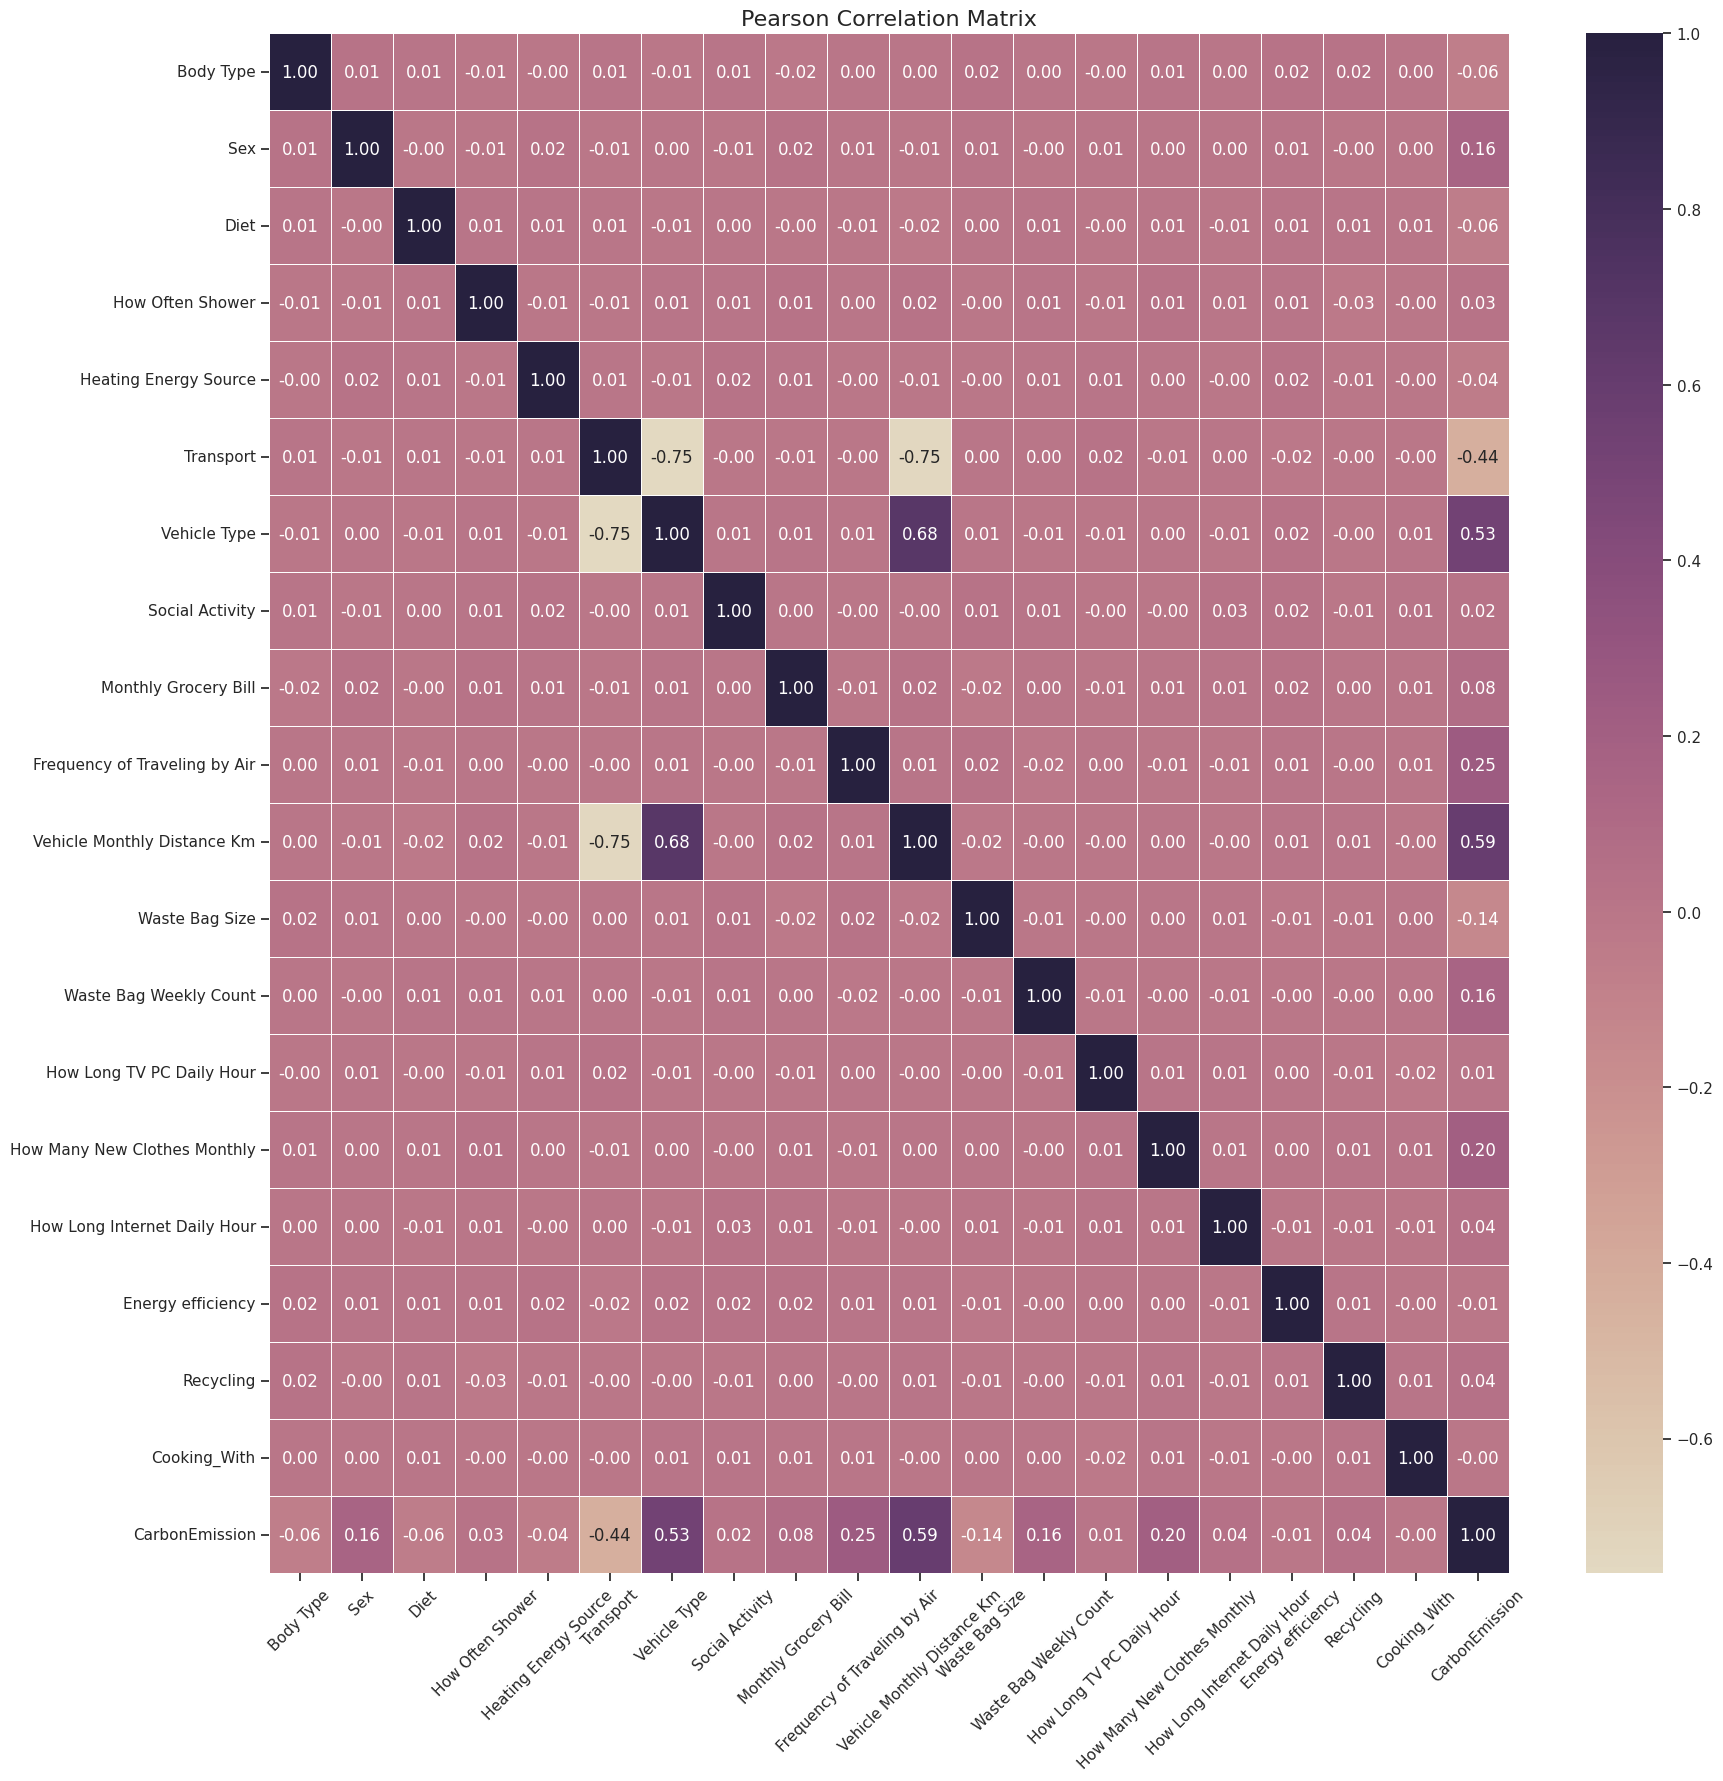

In [130]:
# Se calcula la matriz de correlación usando el coeficiente de correlación de Pearson
correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## Cada gráfico muestra el conteo de categorías dentro de una variable, proporcionando datos visuales claros sobre la composición de los datos. Esta organización facilita la identificación de tendencias y anomalías en el dataset

#**Random Forest Regression + Feature Importance**

In [131]:
# Aquí estamos separando el dataset en dos partes: X, que contiene todas las variables excepto
#'CarbonEmission', que son nuestras características para predecir la huella de carbono; y y, que es
#justamente 'CarbonEmission', nuestra variable objetivo.
#Esto es esencial para entrenar el modelo de aprendizaje automático,
#donde X será la entrada y y lo que intentamos predecir.
X = data.drop(columns=['CarbonEmission'])
y = data['CarbonEmission']

In [132]:
#Primero, creamos un modelo usando el algoritmo de bosques aleatorios con parámetros específicos
#como el número de árboles. Luego, entrenamos este modelo con nuestros datos,
#donde X son las variables que usamos para predecir y y es lo que queremos predecir,
#es decir, la huella de carbono.

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [133]:
# Obtenemos el score OOB (Out-of-Bag),
#que es una medida de cuán bien nuestro modelo de bosques aleatorios predice los
#datos que no vio durante el entrenamiento. Luego, imprimimos ese score para ver el rendimiento del modelo.
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.8077171676181152


# ** Esto sirve como métrica de validación interna para los modelos de Random Forest. Una puntuación OOB más alta indica un mejor rendimiento predictivo, por lo tanto el resultado obtenido es muy bueno**

In [134]:
# Aquí estamos utilizando el modelo para hacer predicciones sobre el conjunto de datos X,
#que son nuestras variables independientes. Esto nos dará como resultado predictions,
#que son las estimaciones de la huella de carbono calculadas por el modelo para cada instancia en X.
predictions = regressor.predict(X)

In [135]:
# Aquí, calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R²)
#para evaluar el rendimiento de nuestro modelo. El MSE mide la diferencia promedio entre los valores
#predichos y los reales, mientras que R² indica qué tan bien las predicciones se ajustan a los datos reales.
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

#Imprimimos ambos valores para revisar cuán preciso es nuestro modelo.
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 19493.369631
R-squared: 0.9811759994281349


### MSE mide la diferencia cuadrática promedio entre los valores reales y previstos de las emisiones de carbono. En el contexto de nuestro problema, significa que, en promedio, las predicciones del modelo están más cerca de los valores reales de emisiones de carbono.
### R cuadrado mide la proporción de la varianza en la variable objetivo (emisiones de carbono) que se explica por las variables independientes (características). La puntuación R^2 varía de 0 a 1, donde 1 indica que el modelo predice perfectamente la variable objetivo y 0 indica que el modelo no explica ninguna variabilidad. En nuestro caso, una puntuación R^2 más alta indica que una mayor proporción de la variación en las emisiones de carbono se explica por las características incluidas en nuestro modelo. Entonces, nuestra puntuación R^2 es muy buena (98%).

In [136]:
# Aquí estamos obteniendo la importancia de cada característica usada por nuestro modelo para hacer
#predicciones. feature_importances_ nos da un score para cada variable en X,
#indicando su relevancia en el modelo.
#Guardamos estos valores junto con los nombres de las columnas para analizar cuáles características
#influyen más en la predicción de la huella de carbono.
feature_importances = regressor.feature_importances_
feature_names = X.columns

In [137]:
# Se crea un DataFrame que contiene las características (Feature) y su importancia (Importance)
#calculada por el modelo.
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [138]:
# Se reordena el DataFrame de importancia de las características, poniendo las más importantes primero.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

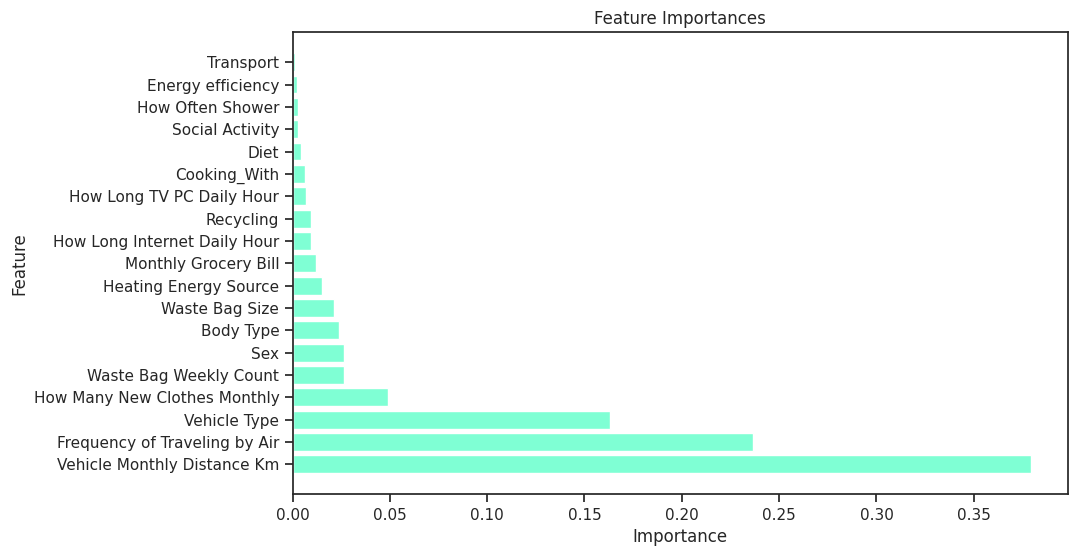

In [139]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [140]:
# Se imprime la lista de características junto con su nivel de importancia según el modelo,
#lo que nos permite identificar cuáles son los factores más determinantes para la predicción de
#la huella de carbono.
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                          Feature  Importance
10    Vehicle Monthly Distance Km    0.379173
9   Frequency of Traveling by Air    0.236339
6                    Vehicle Type    0.163227
14   How Many New Clothes Monthly    0.048820
12         Waste Bag Weekly Count    0.026645
1                             Sex    0.026213
0                       Body Type    0.023761
11                 Waste Bag Size    0.021216
4           Heating Energy Source    0.015295
8            Monthly Grocery Bill    0.012269
15   How Long Internet Daily Hour    0.009656
17                      Recycling    0.009600
13      How Long TV PC Daily Hour    0.006884
18                   Cooking_With    0.006650
2                            Diet    0.004524
7                 Social Activity    0.003059
3                How Often Shower    0.003015
16              Energy efficiency    0.002365
5                       Transport    0.001289


#Conclusiones
###Esta tabla muestra la importancia de cada característica en nuestro modelo de aprendizaje automático, indicando cuánto contribuye cada una al poder predictivo del modelo. La distancia mensual recorrida por vehículos es la más influyente, seguida por la frecuencia de viajes aéreos y el tipo de vehículo. Otras características como la cantidad de ropa nueva comprada mensualmente y la frecuencia semanal de disposición de bolsas de basura también son relevantes, aunque en menor medida. Factores como el género, el tipo de cuerpo, y el tamaño de las bolsas de basura tienen un impacto menor. La eficiencia energética y el modo de transporte son los menos determinantes.